In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

In [2]:
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

In [3]:
n_samples, n_features = X.shape

In [4]:
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [5]:
learning_rate = 0.01

In [6]:
loss = nn.MSELoss()
optimiser = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [7]:
num_epochs = 100
for epoch in range(num_epochs):
    y_predicted = model(X)
    l = loss(y_predicted, y)
    l.backward()
    optimiser.step()
    optimiser.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {l.item():.4f}')

epoch: 10, loss = 3997.3982
epoch: 20, loss = 2818.5291
epoch: 30, loss = 2014.8810
epoch: 40, loss = 1466.9084
epoch: 50, loss = 1093.1929
epoch: 60, loss = 838.2674
epoch: 70, loss = 664.3385
epoch: 80, loss = 545.6484
epoch: 90, loss = 464.6380
epoch: 100, loss = 409.3348


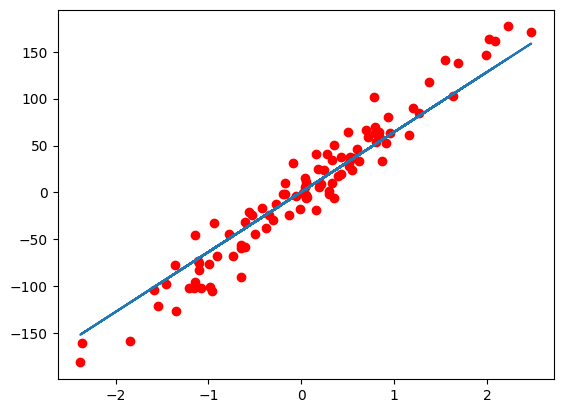

In [8]:
predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, )
plt.show()